# Illustration of the ~2/3 bootstrap sampling rule

Estimated fraction of unique elements in a bootstrap sample: 0.6334


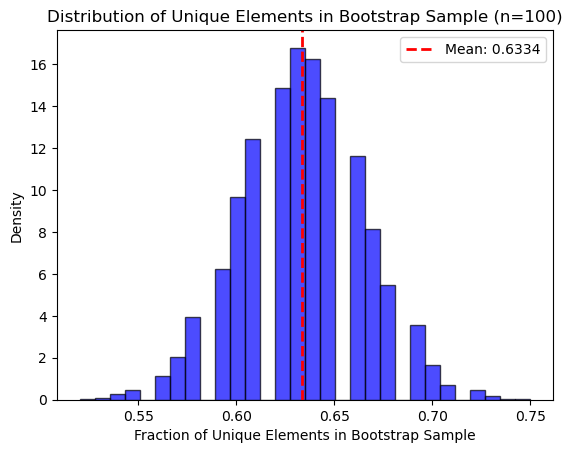

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to estimate the proportion of unique elements in a bootstrap sample

def bootstrap_unique_fraction(n, num_simulations = 10000):
    unique_fractions = []
    
    for _ in range(num_simulations):
        original_data = np.arange (n)
        sample = np.random.choice(original_data, size = n, replace = True)
        unique_count = len(set(sample))
        unique_fractions.append(unique_count/n)
        
    return np.mean(unique_fractions), unique_fractions

# Run simulation
n = 100
mean_unique_fraction, unique_fractions = bootstrap_unique_fraction(n)

# Print the estimated fraction of unique elements
print(f"Estimated fraction of unique elements in a bootstrap sample: {mean_unique_fraction:.4f}")

# Plot the distribution of unique element fractions
plt.hist(unique_fractions, bins=30, density=True, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_unique_fraction, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_unique_fraction:.4f}")
plt.xlabel("Fraction of Unique Elements in Bootstrap Sample")
plt.ylabel("Density")
plt.title(f"Distribution of Unique Elements in Bootstrap Sample (n={n})")
plt.legend()
plt.show()


# Decision tree vs. bagging on synthetic "moon" data

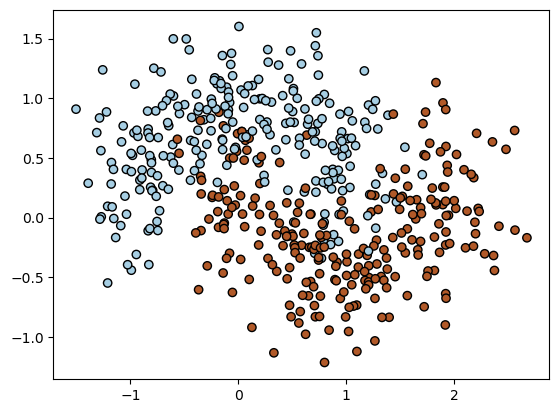

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

# Generate a toy dataset
X, y = make_moons(n_samples = 500, noise = 0.3, random_state = 808)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolor = 'k')

In [14]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Train a Single Decision Tree
tree = DecisionTreeClassifier()

# fit on training data
tree.fit(X_train,y_train)
tree_preds = tree.predict(X_test)

In [19]:
# Train a Bagging Ensemble of Decision Trees
bagging = BaggingClassifier(
            estimator = DecisionTreeClassifier(),
            n_estimators = 50,
            bootstrap = True,
            random_state=808)

# Fit our model
bagging.fit(X_train, y_train)

bagging_preds = bagging.predict(X_test)

# Compare Accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, tree_preds):.3f}")
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_preds):.3f}")

Decision Tree Accuracy: 0.867
Bagging Accuracy: 0.907
